## Classification 
### Introduction
Last week we introduced classification where we assign an input vector $\mathbf{x}\in \mathbf{R}^d$ to one of $K$ classes. That is we aim to learn a function 

$f:\mathbf{R}^d\rightarrow [K]$

#### Simple Classifiers

Consider a two dimensional example where data are drawn from two classes. If we can draw a straight line separating the two classes, a ideal classifier would assign points on one side of the line to one class and those on the other side to the other class. We would use training data to learn the appropriate line. Problems where we can separate classes using lines (hyperplanes) are said to be *linearly separable*

Consider the sample data set below. 



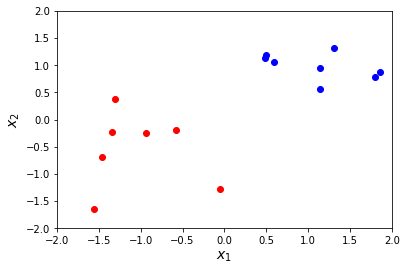

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

num_class = 2
num_per_class = 10
var = 0.5
means = [[1,1],[-1,-1]]
cov = [[var, 0], [0, var]] 
X = np.array([])
y = []
class_color = ['b','r']

for class_index in range(num_class):
    class_data = np.random.multivariate_normal(means[class_index],
                                               cov, 
                                               num_per_class)
    X = np.vstack([X, class_data]) if X.size else class_data
    y = np.concatenate((y, np.ones(num_per_class) * class_index))
    plt.plot(class_data[:, 0], 
             class_data[:,1], 
             class_color[class_index] + 'o')
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel(r'$x_1$', fontsize=14)
    plt.ylabel(r'$x_2$', fontsize=14)

The data $\mathbf{x}_n = [x_{n1}, x_{n2}]^T$ for $n=1,\ldots,N$ are drawn from two Gaussian blobs. In this case we can draw a line separating the two classes. 

Let 

$
\begin{equation}
y = w_1x_1 + w_2x_2 + w_0
\end{equation}$

If we set $w_1=1, w_2=1$ and $w_0=0$ we can separate the classes. We use the following rule

$
\begin{equation}
\mathrm{Class}=\left\{ \begin{array}{ll}
\mathrm{Blue} & \textrm{ $y> 0$}\\
\mathrm{Red} & \textrm{$y<0$}
\end{array} \right.
\end{equation}
$

The classifier corresponds to 

$
\begin{equation}
y(\mathbf{x}) = f(w_1x_1 + w_2x_2 + w_0)
\end{equation}
$ 

where $f(.)$ is the nonlinear activation function given by the unit step

$
\begin{equation}
f(a)=\left\{ \begin{array}{ll}
1 & \textrm{ $a> 0$}\\
0 & \textrm{$a<0$}
\end{array} \right.
\end{equation}
$

Where 1 corresponds to the blue class and 0 to the red class. 

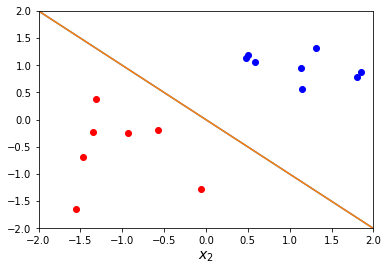

In [2]:
# straight line
x1 = np.linspace(-2, 2, 100)
x2 = -x1
for class_index in range(num_class):
    plt.plot(X[y==class_index, 0], 
             X[y==class_index, 1], 
             class_color[class_index] + 'o')
    plt.plot(x1, x2)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel(r'$x_1$', fontsize=14)
    plt.xlabel(r'$x_2$', fontsize=14)

### The perceptron algorithm

In general linearly separable cases, it will not be easy to find the equation

$
\begin{equation}
y(\mathbf{x}) = f(\mathbf{w}^T\mathbf{x} + w_0)
\end{equation}
$

that separates the classes. We will consider the perceptron algorithm of Rosenblatt which can find the solution to linearly separable classification problems.

In the perceptron we have

$
\begin{equation}
y(\mathbf{x}) = f(\mathbf{w}^T\phi(\mathbf{x}))
\end{equation}
$

where $\phi(x)$ is a nonlinear transformation of the input vector $\mathbf{x}$ and $f(.)$ is given by the step function

$
\begin{equation}
f(a)=\left\{ \begin{array}{ll}
+1 & \textrm{ $a \geq 0$}\\
-1 & \textrm{$a<0$}
\end{array} \right.
\end{equation}
$

We use the target values $t=+1$ for class one and $t=-1$ for class 2. So the target $t\in \{+1, -1\}$. 

We seek a weight vector $\mathbf{w}$ such that for patterns in class one, $\mathbf{w}^T\phi(\mathbf{x})>0$ and for patterns in class two, $\mathbf{w}^T\phi(\mathbf{x})<0$ Thus for all patterns correct $\mathbf{w}$ will ensure 

$
\begin{equation}
\mathbf{w}^T\phi(\mathbf{x}_n)t_n>0
\end{equation}
$

We now introduce the error function which will guide the *learning* of $\mathbf{w}$. We assign zero error to correctly classified examples and try to minimize $-\mathbf{w}^T\phi(\mathbf{x}_n)t_n$ for misclassified examples. The error measure also known as the perceptron criterion is given by

$
\begin{equation}
E_P(\mathbf{w}) = -\sum_{n\in\mathcal{M}}\mathbf{w}^T\phi(\mathbf{x}_n)t_n
\end{equation}
$

Where $\mathcal{M}$ is the set of misclassified examples.

#### Learning - stochastic gradient descent
We have that

$
\begin{equation}
E_P(\mathbf{w}) = \sum_{n\in\mathcal{M}}E_P^n(\mathbf{w})
\end{equation}
$

where $E_P^n(\mathbf{w})=-\mathbf{w}^T\phi(\mathbf{x}_n)t_n$.

We apply stochastic gradient descent starting from an initial weight vector and present the examples one at a time and adjust the weights according to

$
\begin{equation}
\mathbf{w}^{(\tau + 1)}=\mathbf{w}^{(\tau)} - \eta\nabla E_P^n(\mathbf{w}) 
\end{equation}
$

where

$
\begin{equation}
\nabla E_P^n(\mathbf{w})=\left\{ \begin{array}{ll}
-\phi_nt_n &  n\in\mathcal{M}\\
0 & n\notin\mathcal{M}
\end{array} \right.
\end{equation}
$

#### Let's code it up
Let's code up the algorithm assuming $\eta = 1$ and $\phi(x) = x$. We also incorporate the bias term $w_0$ in the weight vector by introducing $\phi_0(x) = 1$. Thus $\mathbf{w} = [w_0, w_1, w_2]^T$ and $\mathbf{x} = [1, x_1, x_2]$.

We define a function that takes in the current training input, current weight vector and target value and returns the gradient. 

In [3]:
def perceptron_gradient(input_vector, weight, target):
    '''Compute the gradient of the perceptron error function
    Args:
        input_vector: the input vector x
        weight: the weight vector w
        target: the target value +1 or -1
    Returns:
        gradient: the gradient at the input vector
    '''
    if np.dot(weight, input_vector) * target < 0:
        return -input_vector * target
    else:
        return np.zeros(len(input_vector))
    

In [4]:
# add x_0 = 1 for all examples
X_new = np.vstack((np.ones(X.shape[0]), X.T)).T
# change the targets to +1, -1 for 1, 0
y_new = 2 * y - 1 

In [5]:
y_new

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

Let's run the algorithm starting at $\mathbf{w} = [0, 1, -1]$. We see that initially some examples are misclassified.

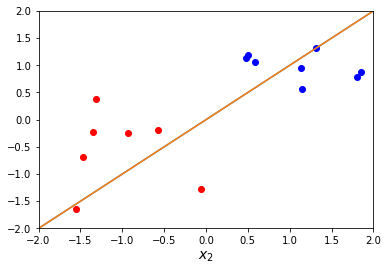

In [6]:
# straight line
x1 = np.linspace(-2, 2, 100)
x2 = x1
for class_index in range(num_class):
    plt.plot(X[y==class_index, 0], 
             X[y==class_index, 1], 
             class_color[class_index] + 'o')
    plt.plot(x1, x2)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel(r'$x_1$', fontsize=14)
    plt.xlabel(r'$x_2$', fontsize=14)

In [7]:
weight_vector = np.array([0, 1, -1])

for index in range(X_new.shape[0]):
    weight_vector = weight_vector - perceptron_gradient(X_new[index, :], 
                                                        weight_vector, 
                                                        y_new[index])

We can now plot the line corresponding to this learned weight vector and verify that it separates the classes correctly.

In [8]:
weight_vector

array([ 0.        , -0.71985713, -1.75359502])

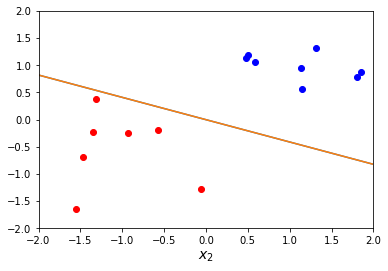

In [9]:
# get the line
x2 = -x1 * (weight_vector[1] / weight_vector[2]) - (weight_vector[0] / weight_vector[2]) 

for class_index in range(num_class):
    plt.plot(X[y==class_index, 0], 
             X[y==class_index, 1], 
             class_color[class_index] + 'o')
    plt.plot(x1, x2)
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel(r'$x_1$', fontsize=14)
    plt.xlabel(r'$x_2$', fontsize=14)

## Reference
This notebook is based on the description of the perceptron algorithm in section 4.1.7 in Bishop's book - [Pattern Recognition and Machine Learning](https://www.springer.com/gp/book/9780387310732)